In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from math import sqrt
from datetime import datetime
from scipy.stats import norm

sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.4f}'.format
%matplotlib inline

In [2]:
data = pd.read_excel('../data/MSCI World Monthly 1969 to 2021.xls', skiprows=6, skipfooter=19)
data = data.rename(columns={'Date' : 'date', 'WORLD Standard (Large+Mid Cap)' : 'value'})
data['date'] = pd.to_datetime(data.date, format='%b %d, %Y')

In [3]:
data['return'] = data.value.pct_change()
data['return'] = data.value.pct_change()
#data = data[~data['return'].isna()]
data

,date,value,return
0,1998-12-31,100.0000,NaN
1,1999-01-29,105.5470,0.0555
2,1999-02-26,106.1670,0.0059
3,1999-03-31,112.3230,0.0580
4,1999-04-30,119.0140,0.0596
...,...,...,...
260,2020-08-31,209.6570,0.0533
261,2020-09-30,206.1390,-0.0168
262,2020-10-30,201.0020,-0.0249
263,2020-11-30,220.5090,0.0970


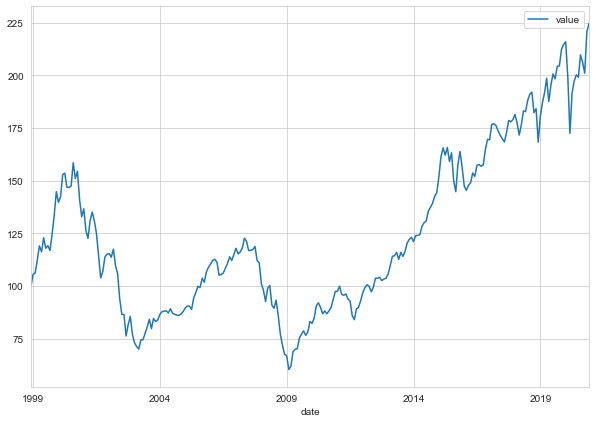

In [4]:
f, ax = plt.subplots(figsize=(10,7))
data.plot.line(x='date', y='value', ax=ax)
#data.plot.line(x='date', y='return', ax=ax, secondary_y=True)
f.show()

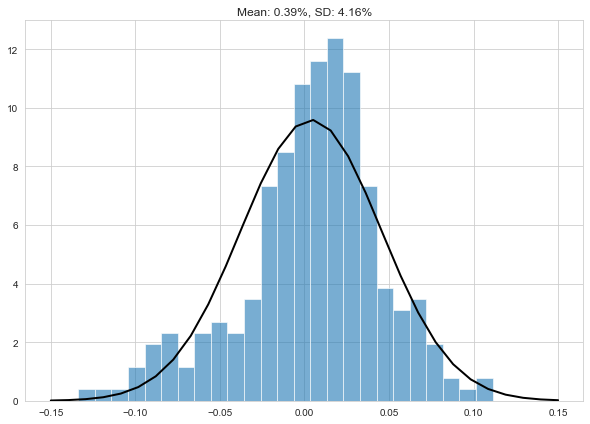

In [5]:
f, ax = plt.subplots(figsize=(10,7))
data['return'].hist(bins=25, alpha=0.6, density=True, ax=ax)

mean_return = data['return'].mean()
std_return = data['return'].std()
xmin, xmax = plt.xlim()
x = np.linspace(-0.15, 0.15, 30)
p = norm.pdf(x, mean_return, std_return)
plt.plot(x, p, 'k', linewidth=2)

ax.set_title(f'Mean: {mean_return:.2%}, SD: {std_return:.2%}')
f.show()

In [6]:
df_yoy = data[data.date.dt.month == 12].reset_index(drop=True)
df_yoy['return'] = df_yoy.value.pct_change()

mean_yoy_return = df_yoy['return'].mean()
std_yoy_return = df_yoy['return'].std()

print(f'Mean YoY Return: {mean_yoy_return:.2%}\tSD: {std_yoy_return:.2%}')

Mean YoY Return: 5.56%	SD: 18.91%


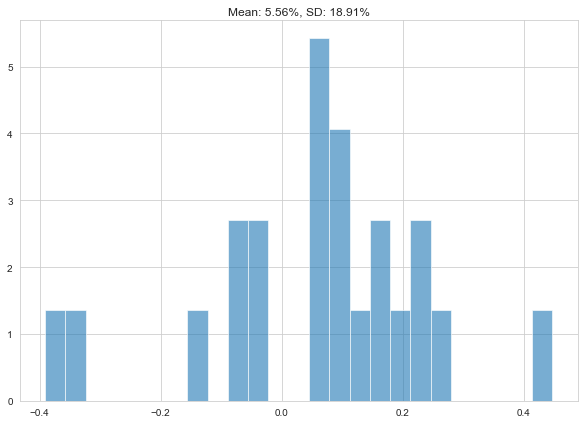

In [61]:
f, ax = plt.subplots(figsize=(10,7))
df_yoy['return'].hist(bins=25, alpha=0.6, density=True, ax=ax)
ax.set_title(f'Mean: {mean_yoy_return:.2%}, SD: {std_yoy_return:.2%}')
f.show()

Invested: 243280, Avg. Value: 732655, Avg. Profit: 489375, SD: 761424, Positive Probability: 80%


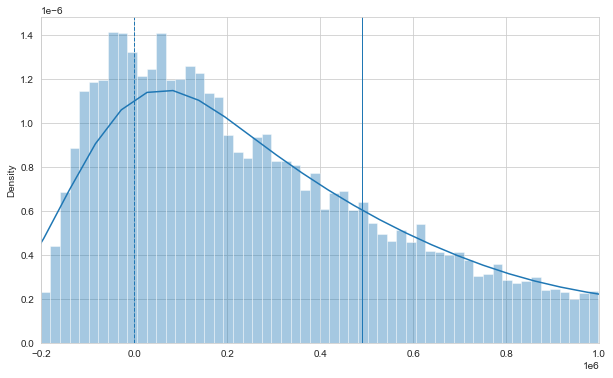

In [59]:
profits, pf_values = [], []

years = 20
start_amount = 5000
monthly_savings = 1000
transaction_costs = 3
annual_inflation_rate = 0.03
yoy_return = 0.055
yoy_std = 0.19

mean_return = yoy_return / 12 #data['return'].mean()
std_return = yoy_std / sqrt(12) #data['return'].std()

simulations = 10000

for i in range(0, simulations):
    amount_to_invest = np.repeat(monthly_savings, years*12-1)
    amount_to_invest = np.insert(amount_to_invest, 0, start_amount, axis=0)

    final_amount_invested = (amount_to_invest - transaction_costs).cumsum()[-1]

    returns = np.random.normal(mean_return, std_return, years*12)
    returns_infla_adj = (1+returns) / (1+annual_inflation_rate / 12) - 1

    #total_net_return_factor = (1+returns_infla_adj).cumprod()[-1]
    #profit_infla_adj = final_amount_invested * total_net_return_factor-(final_amount_invested / (1+annual_inflation_rate)**years)
    #profits.append(profit_infla_adj)

    total_return_factor = (1+returns).cumprod()[-1]
    pf_value = final_amount_invested * total_return_factor
    profit = pf_value - final_amount_invested
    profits.append(profit)
    pf_values.append(pf_value)

mean_pf_value = np.array(pf_values).mean()
std_pf_value = np.array(pf_values).std()
mean_profit = np.array(profits).mean()
std_profit = np.array(profits).std()

n_pos_cases = (np.array(profits) >= 0).sum()
pos_proba = n_pos_cases / simulations

print(f'Invested: {final_amount_invested:.0f}, Avg. Value: {mean_pf_value:.0f}, Avg. Profit: {mean_profit:.0f}, SD: {std_profit:.0f}, Positive Probability: {pos_proba:.0%}')

f, ax = plt.subplots(figsize=(10,6))
sns.distplot(pd.Series(profits), bins=500, kde=True)
ax.axvline(0, ls='--', lw=1)
ax.axvline(mean_profit, ls='-', lw=1)
ax.set_xlim(-200000,1000000)
f.show()

In [ ]:
#np.random.seed(1)

period = 12 * 15
start_amount = 10000
monthly_savings = 1000
transaction_costs = 3
annual_inflation_rate = 0.03

dates = pd.date_range('2021-01-01', periods=period, freq='MS')
amount_to_invest = np.repeat(monthly_savings, period-1)
amount_to_invest = np.insert(amount_to_invest, 0, start_amount, axis=0)
returns = np.random.normal(mean_return, std_return, period)
returns_infla_adj = (1+returns) / (1+annual_inflation_rate / 12) - 1

df_invest = pd.DataFrame({
    'date' : dates, 
    'amount_invested' : amount_to_invest - transaction_costs,
    'total_invested' : (amount_to_invest - transaction_costs).cumsum(),
    'return' : returns,
    'return_infla_adj' : returns_infla_adj,
    'compound_return_factor' : (1+returns).cumprod()
    })

df_invest['portfolio_value'] = df_invest.total_invested * df_invest.compound_return_factor
df_invest

In [ ]:
f, ax = plt.subplots(figsize=(10,7))

df_invest.plot.line(x='date', y='total_invested', ax=ax)
df_invest.plot.line(x='date', y='portfolio_value', ax=ax)

f.show()

In [ ]:
f, ax = plt.subplots(figsize=(10,7))

period = 12 * 15

for i in range(0,9):

    dates = pd.date_range('2021-01-01', periods=period, freq='MS')
    amount_invested = np.repeat(1000, period)
    returns = np.random.normal(mean_return, std_return, period)

    df_invest = pd.DataFrame({
        'date' : dates, 
        'amount_invested' : amount_invested,
        'total_invested' : amount_invested.cumsum(),
        'return' : returns,
        'compound_return_factor' : (1+returns).cumprod()
        })

    df_invest['portfolio_value'] = df_invest.total_invested * df_invest.compound_return_factor

    df_invest.plot.line(x='date', y='portfolio_value', ax=ax)

    if i == 0:
        df_invest.plot.line(x='date', y='total_invested', ax=ax, lw=3, color='k')

f.show()

In [3]:
import numpy as np

array([5, 4, 3])

In [4]:
np.array([5,4,3]) - np.array([5,4,3]) 

array([0, 0, 0])